# Zindi Online Challenge
https://zindi.africa/hackathons/dsn-pre-bootcamp-hackathon-the-excellent-store-challenge/data

## Contents
    1. Imports
    2. EDA
    3. Feature Selection
    4. BenchMarking
    5. Test Data
    6. Machine Learning
 

#  1. Imports

In [233]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [234]:
import warnings
warnings.filterwarnings("ignore")

In [236]:
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10,6)})

# 1.1 Helper Functions

In [91]:
class DataProcess:
    def __init__ (self,df):
        self.df = df
        
    def Numerical (df):
        return df.select_dtypes(include= ['int64', 'float64'])
    
    def Categorical (df):
        return df.select_dtypes(include= ['object'])
    
    def Missing (df):
        return sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
    
    def df_joiner(df1, df2):
        return pd.concat(df1, df2)
    
    def get_month(x):
        return (x.month)
    
    def get_year(x):
        return (x.year)
    
    def get_day(x):
        return (x.day)
    
    def correlation_map(df):
        # create figure and axes and set figure size
        f, ax = plt.subplots(figsize =(20,10))
        return sns.heatmap(data=df.corr(), annot = False)


# 1.2 Read in Data

In [237]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
SampleSubmission= pd.read_csv('SampleSubmission.csv')

In [339]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [7]:
train.head(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.60,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.60,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.60,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.60,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.60,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,BABATUNJI045,DRA12_BABATUNJI045,11.60,Low Sugar,0.000000,Soft Drinks,354.04,2009,NaN,Cluster 2,Supermarket Type1,9572.54
6,DRA24,BABATUNJI010,DRA24_BABATUNJI010,19.35,Normal Sugar,0.066832,Soft Drinks,409.72,2005,NaN,Cluster 3,Grocery Store,818.93
7,DRA24,BABATUNJI013,DRA24_BABATUNJI013,19.35,Normal Sugar,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,BABATUNJI017,DRA24_BABATUNJI017,19.35,Normal Sugar,0.040154,Soft Drinks,411.72,2014,NaN,Cluster 2,Supermarket Type1,2866.27
9,DRA24,BABATUNJI019,DRA24_BABATUNJI019,NaN,Normal Sugar,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


In [8]:
train.tail(10)

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4980,NCZ53,BABATUNJI018,NCZ53_BABATUNJI018,9.60,Low Sugar,0.024577,Health and Hygiene,466.55,2016,Medium,Cluster 3,Supermarket Type2,4710.54
4981,NCZ53,BABATUNJI027,NCZ53_BABATUNJI027,NaN,Low Sugar,0.024359,Health and Hygiene,476.05,1992,Medium,Cluster 3,Supermarket Type3,14131.61
4982,NCZ53,BABATUNJI049,NCZ53_BABATUNJI049,9.60,Low Sugar,0.024515,Health and Hygiene,473.05,2006,Medium,Cluster 1,Supermarket Type1,9892.12
4983,NCZ54,BABATUNJI010,NCZ54_BABATUNJI010,14.65,Low Sugar,0.000000,Household,403.89,2005,NaN,Cluster 3,Grocery Store,812.28
4984,NCZ54,BABATUNJI018,NCZ54_BABATUNJI018,14.65,Low Sugar,0.083699,Household,408.64,2016,Medium,Cluster 3,Supermarket Type2,6498.21
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,NaN,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,NaN,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00
4989,NCZ54,BABATUNJI049,NCZ54_BABATUNJI049,14.65,Low Sugar,0.083489,Household,403.39,2006,Medium,Cluster 1,Supermarket Type1,17870.07


In [51]:
train.columns

Index(['Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [25]:
train.describe()

,Item_Weight,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [240]:
train.isnull().any()                      # returns the feature with True of False (True means Missing values and  else false)

Item_ID                False
Store_ID               False
Item_Store_ID          False
Item_Weight             True
Item_Sugar_Content     False
Item_Visibility        False
Item_Type              False
Item_Price             False
Store_Start_Year       False
Store_Size              True
Store_Location_Type    False
Store_Type             False
Item_Store_Returns     False
dtype: bool

In [241]:
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

##  Data preparation Steps:

#### 1. Drop some Columns that are not useful.
#### 2. Fill NA with Arbitiary Numbers.
#### 3. Convert Strings to Numbers.
      - Identify Distinct Values.
      - Coverts Values to Number 
#### 4. Find MInMax

###  Drop some Columns that are not useful.

In [242]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4188 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           3540 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [243]:
train_df = train[['Item_Store_ID','Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns']]

train_df

,Item_Store_ID,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12_BABATUNJI010,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12_BABATUNJI013,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12_BABATUNJI017,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12_BABATUNJI018,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12_BABATUNJI035,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
...,...,...,...,...,...,...,...,...,...,...
4985,NCZ54_BABATUNJI019,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54_BABATUNJI027,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54_BABATUNJI045,Low Sugar,0.083528,Household,406.14,2009,NaN,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54_BABATUNJI046,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00


In [244]:
train_df = train_df.fillna(value = 'NaN')
train_df.isnull().any()                                               # returns the feature with True of False (True means Missing values and  else false)

Item_Store_ID          False
Item_Sugar_Content     False
Item_Visibility        False
Item_Type              False
Item_Price             False
Store_Start_Year       False
Store_Size             False
Store_Location_Type    False
Store_Type             False
Item_Store_Returns     False
dtype: bool

In [245]:
train_df.Item_Sugar_Content.nunique(), train_df.Item_Sugar_Content.unique().tolist()

(3, ['Low Sugar', 'Ultra Low Sugar', 'Normal Sugar'])

In [246]:
train_df.Item_Type.nunique(), train_df.Item_Type.unique().tolist()

(16,
 ['Soft Drinks',
  'Dairy',
  'Hard Drinks',
  'Canned',
  'Frozen Foods',
  'Fruits and Vegetables',
  'Snack Foods',
  'Baking Goods',
  'Starchy Foods',
  'Meat',
  'Seafood',
  'Breakfast',
  'Breads',
  'Health and Hygiene',
  'Household',
  'Others'])

In [247]:
train_df.Store_Size.nunique(), train_df.Store_Size.unique().tolist()

(4, ['NaN', 'High', 'Medium', 'Small'])

In [148]:
train_df.Store_Location_Type.nunique(), train_df.Store_Location_Type.unique().tolist()

(3, ['Cluster 3', 'Cluster 2', 'Cluster 1'])

In [149]:
train_df.Store_Type.nunique(), train_df.Store_Type.unique().tolist()

(4,
 ['Grocery Store',
  'Supermarket Type1',
  'Supermarket Type2',
  'Supermarket Type3'])

In [257]:
train_df = pd.get_dummies(train_df, columns= ['Item_Sugar_Content','Item_Type','Store_Size','Store_Location_Type','Store_Type'])

train_df.head()

,Item_Store_ID,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,DRA12_BABATUNJI010,0.068535,357.54,2005,709.08,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,DRA12_BABATUNJI013,0.040912,355.79,1994,6381.69,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,DRA12_BABATUNJI017,0.041178,350.79,2014,6381.69,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,DRA12_BABATUNJI018,0.041113,355.04,2016,2127.23,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,DRA12_BABATUNJI035,0.000000,354.79,2011,2481.77,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [258]:
train_df.columns

Index(['Item_Store_ID', 'Item_Visibility', 'Item_Price', 'Store_Start_Year',
       'Item_Store_Returns', 'Item_Sugar_Content_Low Sugar',
       'Item_Sugar_Content_Normal Sugar', 'Item_Sugar_Content_Ultra Low Sugar',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Store_Size_High',
       'Store_Size_Medium', 'Store_Size_NaN', 'Store_Size_Small',
       'Store_Location_Type_Cluster 1', 'Store_Location_Type_Cluster 2',
       'Store_Location_Type_Cluster 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3'],
      dtype='objec

In [336]:
data= train_df.drop(['Item_Store_ID'], axis=1)
data.head()

,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,0.068535,357.54,2005,709.08,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0.040912,355.79,1994,6381.69,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.041178,350.79,2014,6381.69,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.041113,355.04,2016,2127.23,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0.000000,354.79,2011,2481.77,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [337]:
data.Item_Price = data.Item_Price.transform(lambda x:x/1000)
data.Store_Start_Year = data.Store_Start_Year.transform(lambda x:x/10000)
data.Item_Store_Returns= data.Item_Store_Returns.transform(lambda x:x/100000)

In [312]:
# Making use of Sklearn

#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()

#data[data.columns] = scaler.fit_transform(data[data.columns])

In [338]:
data.head(10)

,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,0.068535,0.35754,0.2005,0.007091,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0.040912,0.35579,0.1994,0.063817,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.041178,0.35079,0.2014,0.063817,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0.041113,0.35504,0.2016,0.021272,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0.000000,0.35479,0.2011,0.024818,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
5,0.000000,0.35404,0.2009,0.095725,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
6,0.066832,0.40972,0.2005,0.008189,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
7,0.039895,0.40622,0.1994,0.110556,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
8,0.040154,0.41172,0.2014,0.028663,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,0.069909,0.40822,0.1992,0.012284,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0


In [340]:
data.tail(7)

,Item_Visibility,Item_Price,Store_Start_Year,Item_Store_Returns,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
4983,0.000000,0.40389,0.2005,0.008123,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4984,0.083699,0.40864,0.2016,0.064982,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4985,0.145952,0.40239,0.1992,0.004061,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4986,0.082956,0.41014,0.1992,0.138087,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4987,0.083528,0.40614,0.2009,0.056859,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4988,0.083359,0.40489,0.2004,0.117780,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4989,0.083489,0.40339,0.2006,0.178701,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [341]:
from sklearn.model_selection import train_test_split

X = data.drop('Item_Store_Returns', axis=1)
Y = data['Item_Store_Returns']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [342]:
x_train.shape, x_test.shape

((3493, 33), (1497, 33))

In [343]:
y_train.shape, y_test.shape

((3493,), (1497,))

In [349]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept=True).fit(x_train, y_train)

In [345]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.5589310780752326


In [414]:
linear_model2 = LinearRegression(fit_intercept=False).fit(x_train, y_train)

In [346]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.5589310780752326


In [416]:
flinear_model = LinearRegression().fit(x_train, y_train)

In [348]:
print("Training_score : " , linear_model.score(x_train, y_train))

Training_score :  0.5589310780752326


## Test data

In [353]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          2871 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           2573 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.2+ KB


In [354]:
test_df = test[['Item_Store_ID','Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type']]

test_df

,Item_Store_ID,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type
0,DRA59_BABATUNJI010,Normal Sugar,0.214125,Soft Drinks,459.98,2005,NaN,Cluster 3,Grocery Store
1,DRA59_BABATUNJI013,Normal Sugar,0.127821,Soft Drinks,464.98,1994,High,Cluster 3,Supermarket Type1
2,DRB01_BABATUNJI013,Low Sugar,0.082171,Soft Drinks,477.38,1994,High,Cluster 3,Supermarket Type1
3,DRB13_BABATUNJI010,Normal Sugar,0.011791,Soft Drinks,472.63,2005,NaN,Cluster 3,Grocery Store
4,DRB13_BABATUNJI013,Normal Sugar,0.007038,Soft Drinks,473.13,1994,High,Cluster 3,Supermarket Type1
...,...,...,...,...,...,...,...,...,...
3527,NCZ42_BABATUNJI010,Low Sugar,0.000000,Household,595.81,2005,NaN,Cluster 3,Grocery Store
3528,NCZ42_BABATUNJI013,Low Sugar,0.011279,Household,592.56,1994,High,Cluster 3,Supermarket Type1
3529,NCZ42_BABATUNJI049,Ultra Low Sugar,0.011305,Household,588.81,2006,Medium,Cluster 1,Supermarket Type1
3530,NCZ53_BABATUNJI010,Low Sugar,0.040970,Health and Hygiene,471.80,2005,NaN,Cluster 3,Grocery Store


In [355]:
test_df = test_df.fillna(value = 'NaN')
test_df.isnull().any()                                               # returns the feature with True of False (True means Missing values and  else false)

Item_Store_ID          False
Item_Sugar_Content     False
Item_Visibility        False
Item_Type              False
Item_Price             False
Store_Start_Year       False
Store_Size             False
Store_Location_Type    False
Store_Type             False
dtype: bool

In [356]:
test_df.Item_Sugar_Content.nunique(), test_df.Item_Sugar_Content.unique().tolist()

(3, ['Normal Sugar', 'Low Sugar', 'Ultra Low Sugar'])

In [357]:
test_df.Item_Type.nunique(), test_df.Item_Type.unique().tolist()

(16,
 ['Soft Drinks',
  'Dairy',
  'Hard Drinks',
  'Canned',
  'Frozen Foods',
  'Fruits and Vegetables',
  'Snack Foods',
  'Baking Goods',
  'Starchy Foods',
  'Meat',
  'Seafood',
  'Breakfast',
  'Breads',
  'Household',
  'Health and Hygiene',
  'Others'])

In [358]:
test_df.Store_Size.nunique(), test_df.Store_Size.unique().tolist()

(4, ['NaN', 'High', 'Medium', 'Small'])

In [359]:
test_df.Store_Location_Type.nunique(), test_df.Store_Location_Type.unique().tolist()

(3, ['Cluster 3', 'Cluster 2', 'Cluster 1'])

In [360]:
test_df.Store_Type.nunique(), test_df.Store_Type.unique().tolist()

(4,
 ['Grocery Store',
  'Supermarket Type1',
  'Supermarket Type3',
  'Supermarket Type2'])

In [361]:
test_df = pd.get_dummies(test_df, columns= ['Item_Sugar_Content','Item_Type','Store_Size','Store_Location_Type','Store_Type'])

test_df.head()

,Item_Store_ID,Item_Visibility,Item_Price,Store_Start_Year,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,DRA59_BABATUNJI010,0.214125,459.98,2005,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,DRA59_BABATUNJI013,0.127821,464.98,1994,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,DRB01_BABATUNJI013,0.082171,477.38,1994,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,DRB13_BABATUNJI010,0.011791,472.63,2005,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,DRB13_BABATUNJI013,0.007038,473.13,1994,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [362]:
test_df.columns

Index(['Item_Store_ID', 'Item_Visibility', 'Item_Price', 'Store_Start_Year',
       'Item_Sugar_Content_Low Sugar', 'Item_Sugar_Content_Normal Sugar',
       'Item_Sugar_Content_Ultra Low Sugar', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Store_Size_High',
       'Store_Size_Medium', 'Store_Size_NaN', 'Store_Size_Small',
       'Store_Location_Type_Cluster 1', 'Store_Location_Type_Cluster 2',
       'Store_Location_Type_Cluster 3', 'Store_Type_Grocery Store',
       'Store_Type_Supermarket Type1', 'Store_Type_Supermarket Type2',
       'Store_Type_Supermarket Type3'],
      dtype='object')

In [363]:
test_data= test_df.drop(['Item_Store_ID'], axis=1)
test_data.head()

,Item_Visibility,Item_Price,Store_Start_Year,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,0.214125,459.98,2005,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0.127821,464.98,1994,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.082171,477.38,1994,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0.011791,472.63,2005,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.007038,473.13,1994,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [369]:
test_data.Item_Price = test_data.Item_Price.transform(lambda x:x/1000)
test_data.Store_Start_Year = test_data.Store_Start_Year.transform(lambda x:x/10000)

In [278]:
# Making use of Sklearn

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# test_data[test_data.columns] = scaler.fit_transform(test_data[test_data.columns])

In [370]:
test_data.head()

,Item_Visibility,Item_Price,Store_Start_Year,Item_Sugar_Content_Low Sugar,Item_Sugar_Content_Normal Sugar,Item_Sugar_Content_Ultra Low Sugar,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Store_Size_Medium,Store_Size_NaN,Store_Size_Small,Store_Location_Type_Cluster 1,Store_Location_Type_Cluster 2,Store_Location_Type_Cluster 3,Store_Type_Grocery Store,Store_Type_Supermarket Type1,Store_Type_Supermarket Type2,Store_Type_Supermarket Type3
0,0.214125,0.45998,0.2005,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
1,0.127821,0.46498,0.1994,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,0.082171,0.47738,0.1994,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0.011791,0.47263,0.2005,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,0.007038,0.47313,0.1994,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [373]:
y_pred = linear_model.predict(test_data)
y_pred

array([0.03550911, 0.07415962, 0.07380295, ..., 0.09378052, 0.03262138,
       0.0693779 ])

In [415]:
y_pred = linear_model2.predict(test_data)
y_pred

array([0.03550911, 0.07415962, 0.07380295, ..., 0.09378052, 0.03262138,
       0.0693779 ])

In [421]:
y_pred = flinear_model.predict(test_data)
y_pred

array([0.03527832, 0.07421875, 0.07397461, ..., 0.09423828, 0.03222656,
       0.06921387])

In [422]:
results = {'Item_Store_ID':test_df['Item_Store_ID'], 'Item_Store_Returns':y_pred}
results = pd.DataFrame(results)

In [419]:
results.Item_Store_Returns = results.Item_Store_Returns.transform(lambda x:x * 100000)

In [420]:
results.head(20)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,3550.910950
1,DRA59_BABATUNJI013,7415.962219
2,DRB01_BABATUNJI013,7380.294800
3,DRB13_BABATUNJI010,3854.370117
4,DRB13_BABATUNJI013,7605.743408
5,DRB25_BABATUNJI017,5079.269409
6,DRB25_BABATUNJI027,9596.633911
7,DRB25_BABATUNJI035,5235.671997
8,DRB48_BABATUNJI017,2832.031250
9,DRB48_BABATUNJI027,7500.076294


In [384]:
results.tail(20)

,Item_Store_ID,Item_Store_Returns
3512,NCZ06_BABATUNJI046,9486.198425
3513,NCZ06_BABATUNJI049,9923.171997
3514,NCZ17_BABATUNJI017,2336.120605
3515,NCZ17_BABATUNJI018,956.344604
3516,NCZ17_BABATUNJI027,6888.771057
3517,NCZ17_BABATUNJI045,1784.896851
3518,NCZ17_BABATUNJI046,1650.047302
3519,NCZ18_BABATUNJI018,8866.500854
3520,NCZ18_BABATUNJI046,9556.579590
3521,NCZ18_BABATUNJI049,9957.885742


In [386]:
import numpy as np # linear algebra
import pandas as pd # data processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from pandas import DataFrame,Series
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm

## LinearRegression

In [387]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [423]:
print("Training_score : " , lin_reg.score(x_train, y_train))

Training_score :  0.5589310780752326


In [413]:
y_pred = lin_reg.predict(test_data)
y_pred

array([0.03527832, 0.07421875, 0.07397461, ..., 0.09423828, 0.03222656,
       0.06921387])

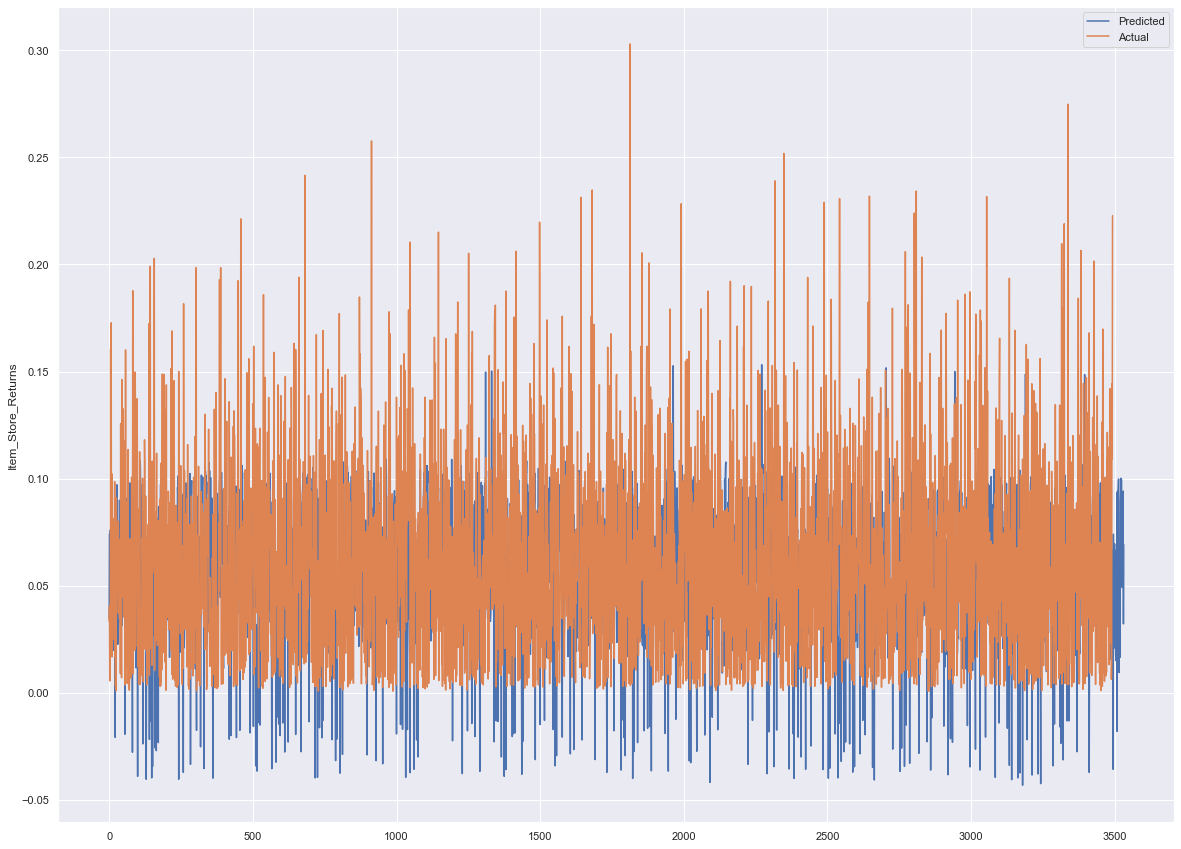

In [439]:
plt.figure(figsize = (20, 15))

plt.plot(y_pred, label='Predicted')
plt.plot(y_train.values, label='Actual')

plt.ylabel('Item_Store_Returns')

plt.legend()
plt.show()

##  DecisionTreeRegressor

In [440]:
dt_regressor = DecisionTreeRegressor(random_state = 0)
dt_regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [441]:
print("Training_score : " , dt_regressor.score(x_train, y_train))

Training_score :  0.9999979535033406


In [442]:
y_pred = dt_regressor.predict(test_data)
y_pred

array([0.0262658 , 0.1110554 , 0.0764338 , ..., 0.0701087 , 0.0370518 ,
       0.04693895])

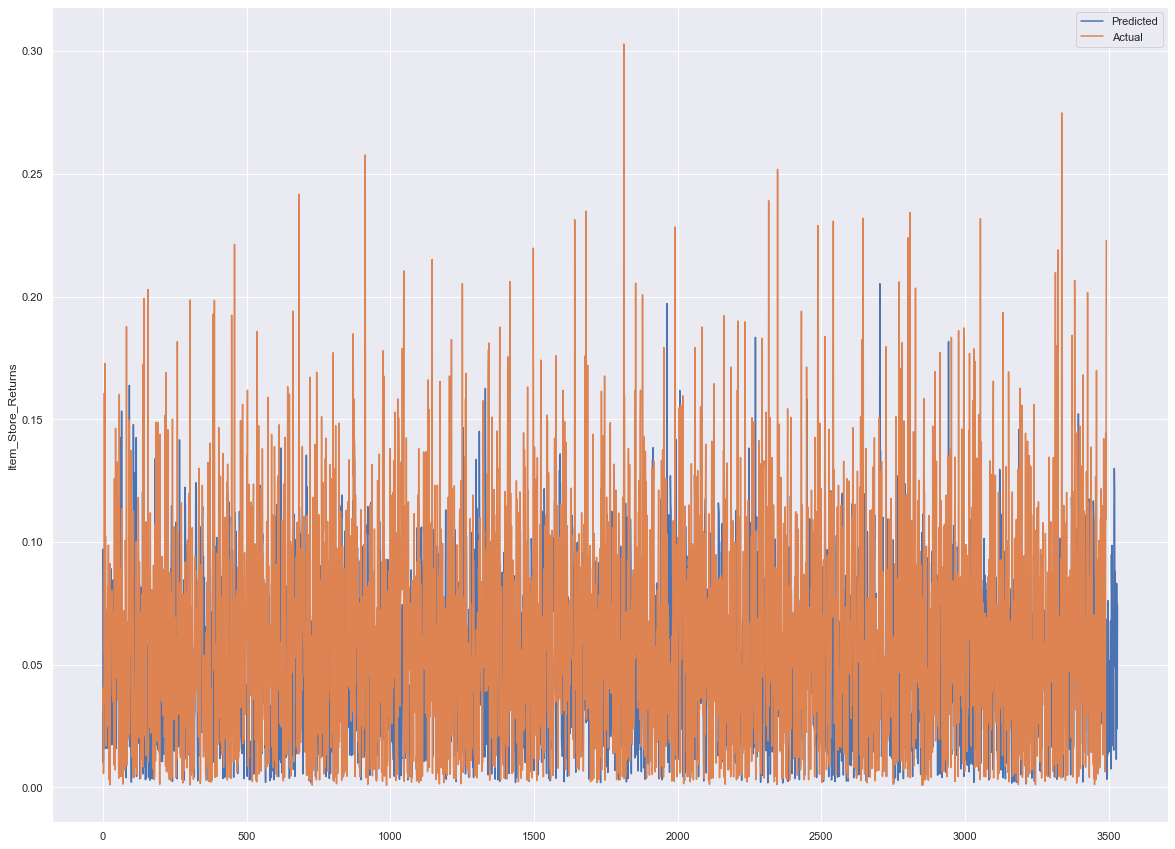

In [450]:
plt.figure(figsize = (20, 15))

plt.plot(y_pred, label='Predicted')
plt.plot(y_train.values, label='Actual')

plt.ylabel('Item_Store_Returns')

plt.legend()
plt.show()

In [451]:
results = {'Item_Store_ID':test_df['Item_Store_ID'], 'Item_Store_Returns':y_pred}
results = pd.DataFrame(results)

In [452]:
results.Item_Store_Returns = results.Item_Store_Returns.transform(lambda x:x * 100000)

In [453]:
results.head(20)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1002.812013
1,DRA59_BABATUNJI013,9706.359111
2,DRB01_BABATUNJI013,7875.765886
3,DRB13_BABATUNJI010,1597.705332
4,DRB13_BABATUNJI013,7854.561728
5,DRB25_BABATUNJI017,3556.403989
6,DRB25_BABATUNJI027,6942.445650
7,DRB25_BABATUNJI035,3925.239144
8,DRB48_BABATUNJI017,1658.787128
9,DRB48_BABATUNJI027,5734.324443


In [456]:
results.to_csv('SampleSubmission_new.csv', index=False)

## RandomForestRegressor

In [444]:
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [445]:
print("Training_score : " , rf_regressor.score(x_train, y_train))

Training_score :  0.9320951408941639


In [446]:
y_pred = rf_regressor.predict(test_data)
y_pred

array([0.01002812, 0.09706359, 0.07875766, ..., 0.06999891, 0.02381616,
       0.07418411])

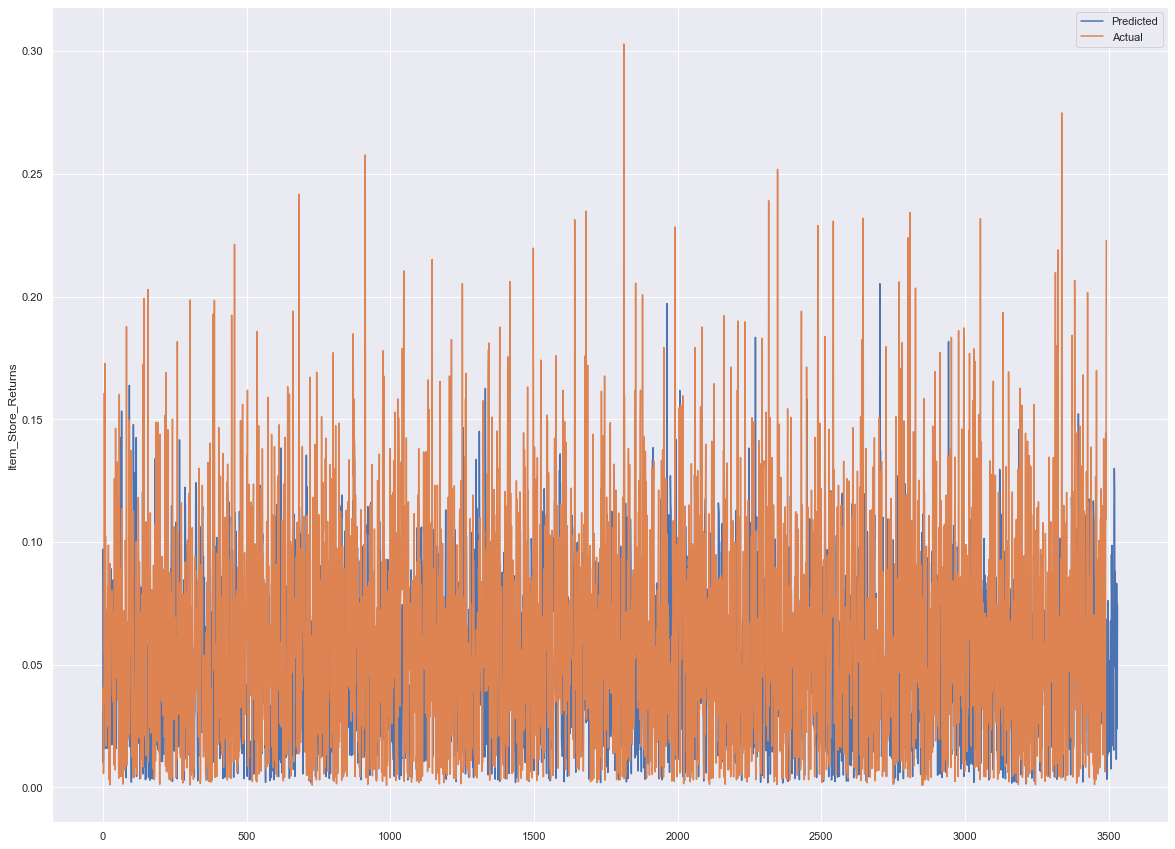

In [447]:
plt.figure(figsize = (20, 15))

plt.plot(y_pred, label='Predicted')
plt.plot(y_train.values, label='Actual')

plt.ylabel('Item_Store_Returns')

plt.legend()
plt.show()

In [460]:
results = {'Item_Store_ID':test_df['Item_Store_ID'], 'Item_Store_Returns':y_pred}
results = pd.DataFrame(results)
results.Item_Store_Returns = results.Item_Store_Returns.transform(lambda x:x * 100000)
results.head(20)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1002.812013
1,DRA59_BABATUNJI013,9706.359111
2,DRB01_BABATUNJI013,7875.765886
3,DRB13_BABATUNJI010,1597.705332
4,DRB13_BABATUNJI013,7854.561728
5,DRB25_BABATUNJI017,3556.403989
6,DRB25_BABATUNJI027,6942.445650
7,DRB25_BABATUNJI035,3925.239144
8,DRB48_BABATUNJI017,1658.787128
9,DRB48_BABATUNJI027,5734.324443


In [461]:
results.to_csv('SampleSubmission_new_RFR.csv', index=False)

## SVM

In [407]:
from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [427]:
print("Training_score : " ,regressor.score(x_train, y_train))

Training_score :  -0.9444163474832812


In [410]:
y_pred = regressor.predict(test_data)
y_pred

array([0.10491678, 0.11069599, 0.11010905, ..., 0.11522049, 0.10472734,
       0.11035756])

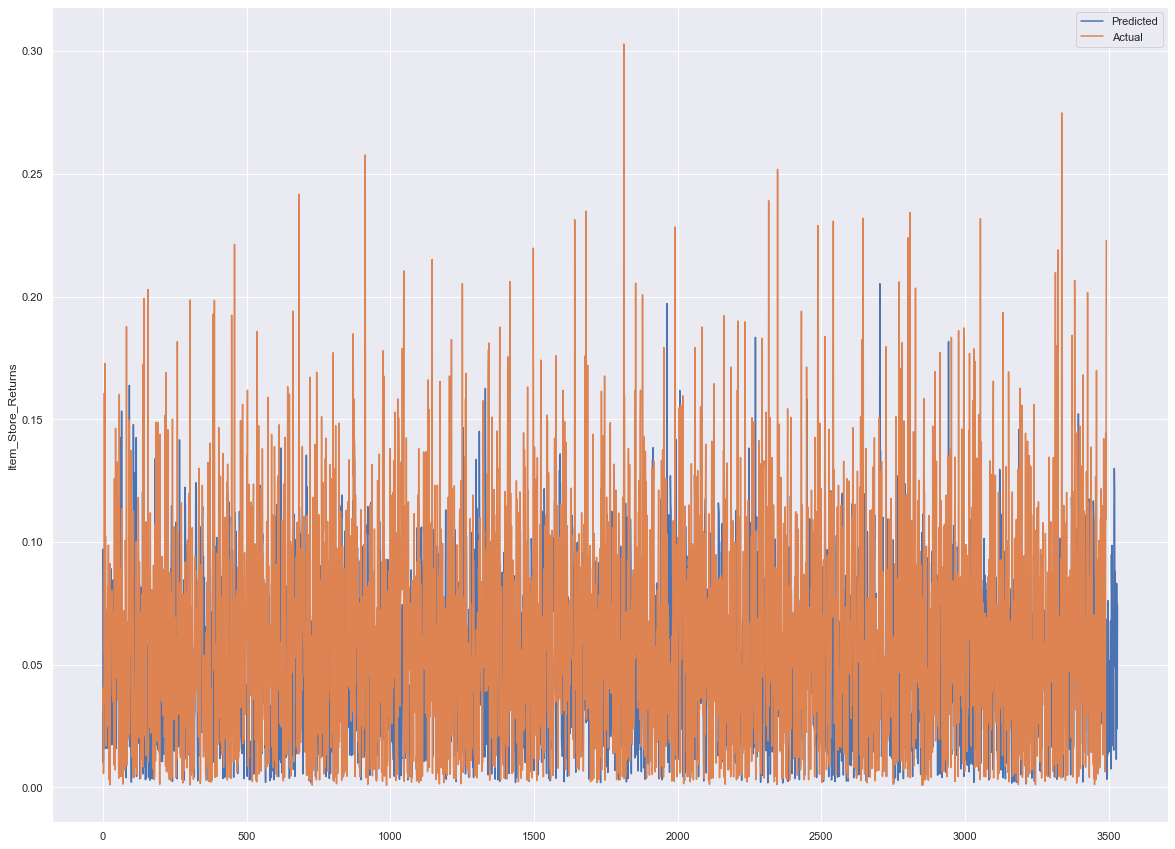

In [448]:
plt.figure(figsize = (20, 15))

plt.plot(y_pred, label='Predicted')
plt.plot(y_train.values, label='Actual')

plt.ylabel('Item_Store_Returns')

plt.legend()
plt.show()

In [462]:
results = {'Item_Store_ID':test_df['Item_Store_ID'], 'Item_Store_Returns':y_pred}
results = pd.DataFrame(results)
results.Item_Store_Returns = results.Item_Store_Returns.transform(lambda x:x * 100000)
results.head(20)

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,1002.812013
1,DRA59_BABATUNJI013,9706.359111
2,DRB01_BABATUNJI013,7875.765886
3,DRB13_BABATUNJI010,1597.705332
4,DRB13_BABATUNJI013,7854.561728
5,DRB25_BABATUNJI017,3556.403989
6,DRB25_BABATUNJI027,6942.445650
7,DRB25_BABATUNJI035,3925.239144
8,DRB48_BABATUNJI017,1658.787128
9,DRB48_BABATUNJI027,5734.324443


In [463]:
results.to_csv('SampleSubmission_new_SVM.csv', index=False)